In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import audio_transport as ap
from audio_transport.gen_utils import gen_sinewave, gen_gaussian, normalize
from audio_transport.spec_utils import stft
from audio_transport.plot_utils import plot_spectogram, plot_progression
from audio_transport.transport_utils import compute_optimal_map, compute_optimal_map_lp
from audio_transport.transport_utils import optimal_1d_mapping, interpolate, join_stfts
import cvxpy as cp

import time

Generating two simulated spectra composed of sums of gaussians

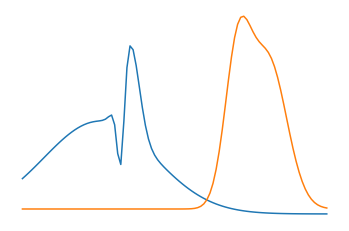

In [15]:
N = 100

mass = lambda x: np.sum(np.abs(x))

t = np.arange(0,N)/N

sigma = .06
a = gen_gaussian(.25,3 * sigma, N) + gen_gaussian(.35, 0.5 * sigma, N) - gen_gaussian(.32, 0.2 * sigma, N) 
b = gen_gaussian(.8,sigma, N) + gen_gaussian(.7,0.7 * sigma, N) 

a = normalize(a)
b = normalize(b)

plt.plot(t, a)
plt.plot(t, b)
plt.axis('off')
plt.show()

Computes the optimal mapping using the greedy algorithm

In [16]:
start_time = time.time()
p = compute_optimal_map(a, b)
print('Execution time: ' + str(time.time() - start_time)  + "seconds")

Execution time: 0.003013134002685547seconds


(-4.95, 103.95, 0.0015954276264951248, 0.06341348621874969)

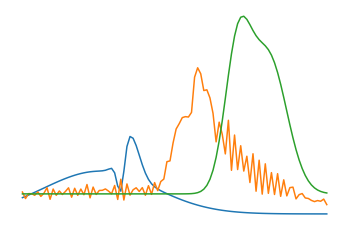

In [17]:
plt.plot(interpolate(p, 0, mass1=mass(a), mass2=2*mass(b)))
plt.plot(interpolate(p, 0.6, mass1=mass(a), mass2=2*mass(b)))
plt.plot(interpolate(p, 1, mass1=mass(a), mass2=2*mass(b)))
plt.axis('off')

Plot optimal mapping p.

(-0.5, 99.5, 99.5, -0.5)

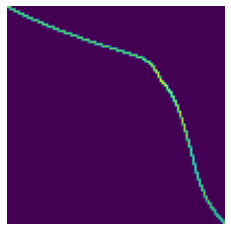

In [18]:
plt.imshow(np.log(p+1e-5))
#plt.imgshow(p)
plt.axis('off')

Displays trivial interpolation and displacement interpolation given the optimal mapping for varying the interpolation parameter t.

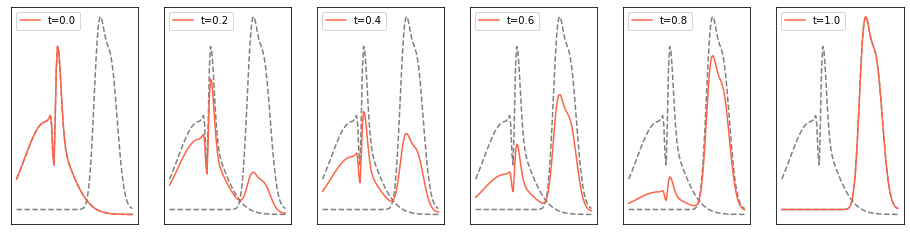

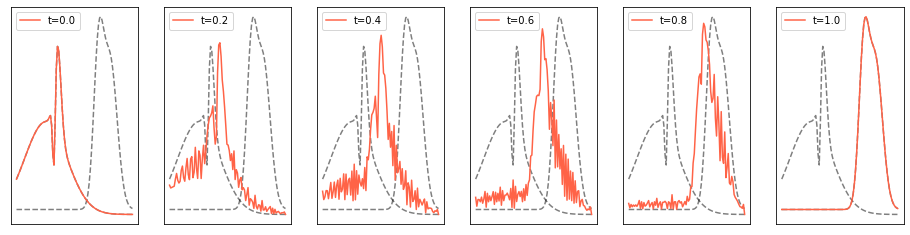

In [19]:
plot_progression(a, b, interp='trivial', figsize=(16,4))
plot_progression(a, b, interp='displacement', mapping=p, figsize=(16,4))

Computes optimal mapping using LP solver

In [24]:
start_time = time.time()
P = compute_optimal_map_lp(a, b, N, N)
print(time.time() - start_time, "seconds")

0.5673081874847412 seconds


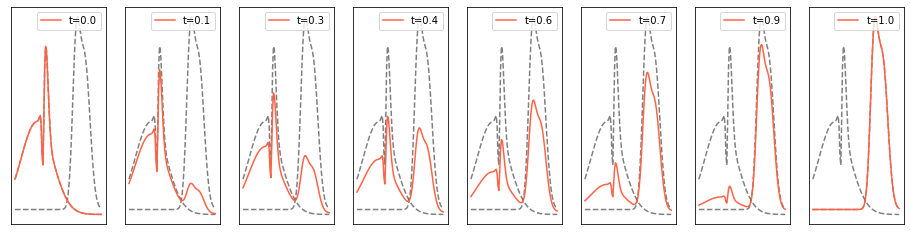

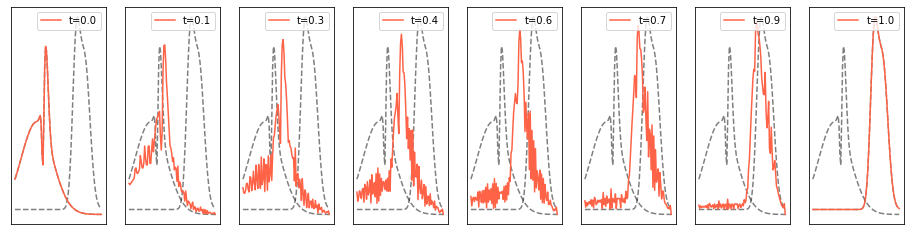

In [25]:
plot_progression(a, b, interp='trivial', figsize=(16,4), size=8)
plot_progression(a, b, interp='displacement', mapping=P, figsize=(16,4), size=8)

(-0.5, 99.5, 99.5, -0.5)

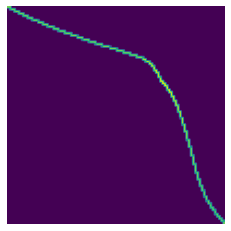

In [26]:
plt.imshow(np.log(P+1e-5))
#plt.imgshow(p)
plt.axis('off')

In [32]:
I,J = np.nonzero(p>1e-5)
Pij = p[I,J]
print(f"Number of non-zero entries is {Pij.shape[0]}, N+N-1={N+N-1}")

Number of non-zero entries is 199, N+N-1=199


In [33]:
import pandas as pd
pd.DataFrame(p)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.00505,0.003981,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.001070,0.00505,0.003274,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.00000,0.001776,0.00505,0.002944,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.00000,0.000000,0.00000,0.002107,0.00505,0.002999,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.002051,0.00505,0.003449,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000587,0.003822,0.000000,0.000000,0.000000
96,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.001781,0.002626,0.000000,0.000000
97,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.002774,0.001633,0.000000
98,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003632,0.000774
